In [150]:
#################################################################################################
## Import Section & Session creation

from data_session import Session
import numpy as np
import matplotlib.pyplot as plt
from multiple_sessions import *
from timeit import time


#file_name = 'V1_SESSION_B20141210_1.mat'
file_name = 'V1_SESSION_Darwin_20151022_1.mat'
file_name2 = 'V4_SESSION_Darwin_20151024_1.mat'
#file_name3 = 'dlPFC_SESSION_E20150319_8.mat'
file_name3 = 'dlPFC_SESSION_E20150401_5.mat'

s = Session(file_name,normalized=True)
s2 = Session(file_name2,normalized=True)
s3 = Session(file_name3,normalized=True)
stimulus_offset = 228 #MAGIC NUMBER TO COMPUTE
stimulus_end = 428 #MAGIC NUMBER TO COMPUTE
end_signal = 763 #MAGIC NUMBER TO COMPUTE



In [168]:
#################################################################################################
## Finding best contrast and channel (Signal over Noise Ratio)

best_contrast = np.argmax(s.get_snr("contrast",True))
best_channel = np.argmax(s.get_snr("channel",True))
print("Best contrast : " + str(best_contrast))
print("Best channel : " + str(best_channel))
best_contrast2 = np.argmax(s2.get_snr("contrast",False))
best_channel2 = np.argmax(s2.get_snr("channel",False))
best_contrast3 = np.argmax(s3.get_snr("contrast",False))
best_channel3 = np.argmax(s3.get_snr("channel",False))


data_type = "seen"
a = np.clip(s.get_data(data_type)[best_contrast],-10,2)


SNR for contrast #0 : 7.09
SNR for contrast #1 : 36.58
SNR for contrast #2 : 16.43
SNR for contrast #3 : 13.75
SNR for channel #0 : 5.85
SNR for channel #1 : 7.3
SNR for channel #2 : 22.7
SNR for channel #3 : 25.02
SNR for channel #4 : 9.28
SNR for channel #5 : 13.31
SNR for channel #6 : 9.36
SNR for channel #7 : 7.79
SNR for channel #8 : 6.26
SNR for channel #9 : 3.93
Best contrast : 1
Best channel : 3


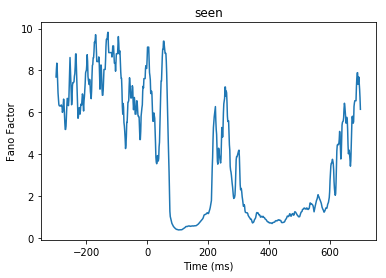

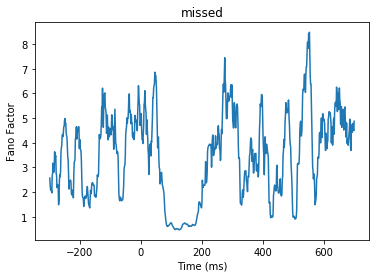

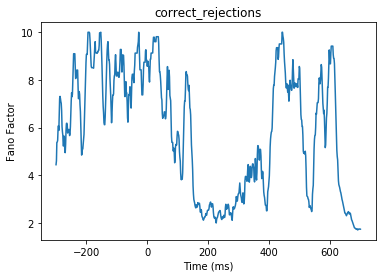

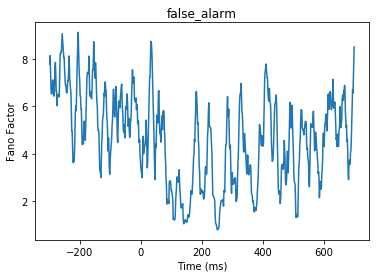

In [171]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for V1

for data_type in ("seen","missed","correct_rejections","false_alarm"):
    if data_type in ("correct_rejections","false_alarm"):
        best_contrast = 0
    else:
        best_contrast = np.argmax(s.get_snr("contrast",False))
    a = np.clip(s.get_data(data_type)[best_contrast],-10,2)

    # Selecting the channel #4
    channel_number = best_channel
    d = a[:,channel_number,:]
    stimulus_offset = 0
    stimulus_end = 763


    smooth = 1
    smoothed_d = s.array_smoother(d,smooth,2)

    title = 'Fano factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s.get_time_step())) +'ms)'
    title = data_type
    ylabel = "Fano Factor"
    s._core_figure_1(np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10),title,10,True,(stimulus_offset,stimulus_end),ylabel)


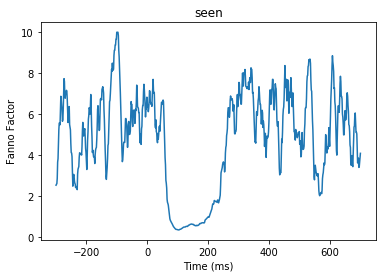

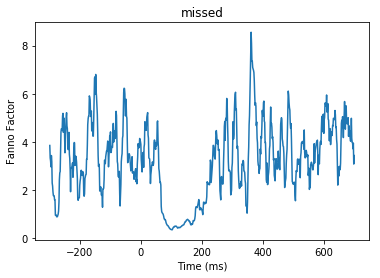

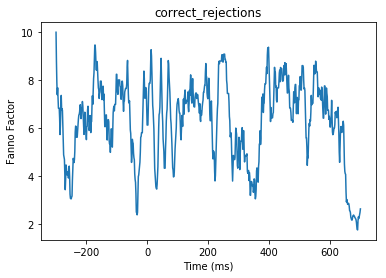

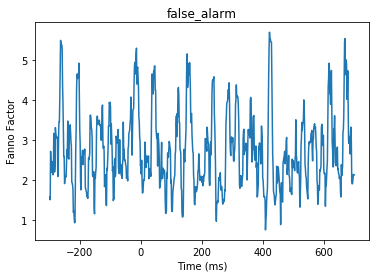

In [158]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for V1

for data_type in ("seen","missed","correct_rejections","false_alarm"):
    if data_type in ("correct_rejections","false_alarm"):
        best_contrast = 0
    else:
        best_contrast = np.argmax(s2.get_snr("contrast",False))
    a = np.clip(s2.get_data(data_type)[best_contrast],-10,2)

    # Selecting the channel #4
    channel_number = best_channel2
    d = a[:,channel_number,:]
    stimulus_offset = 0
    stimulus_end = 763


    smooth = 1
    smoothed_d = s2.array_smoother(d,smooth,2)

    title = 'Fanno factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)'
    ylabel = "Fanno Factor"
    title= data_type
    data = np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10)
    s2._core_figure_1(data,title,10,True,(stimulus_offset,stimulus_end),ylabel)


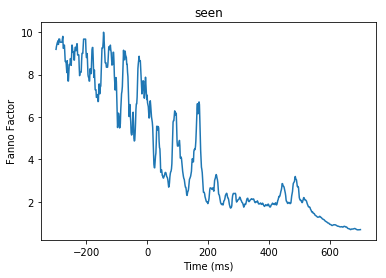

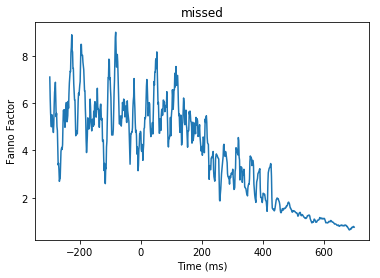

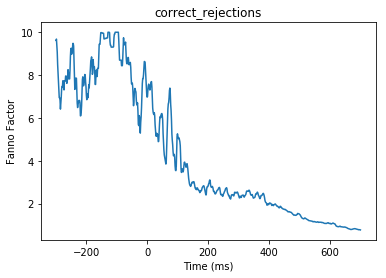

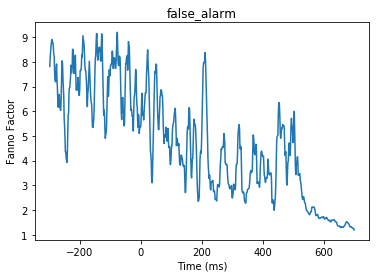

In [159]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for V1

for data_type in ("seen","missed","correct_rejections","false_alarm"):
    if data_type in ("correct_rejections","false_alarm"):
        best_contrast = 0
    else:
        best_contrast = np.argmax(s3.get_snr("contrast",False))
    a = np.clip(s3.get_data(data_type)[best_contrast],-10,2)

    channel_number = best_channel3
    d = a[:,channel_number,:]
    stimulus_offset = 0
    stimulus_end = 763


    smooth = 1
    smoothed_d = s3.array_smoother(d,smooth,2)

    title = 'Fanno factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)'
    ylabel = "Fanno Factor"
    title = data_type
    data = np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10)
    s3._core_figure_1(data,title,10,True,(stimulus_offset,stimulus_end),ylabel)


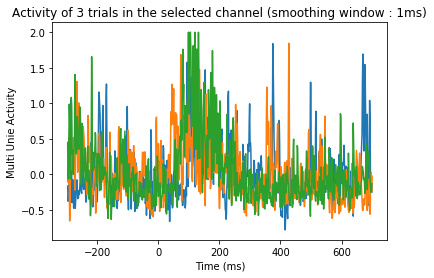

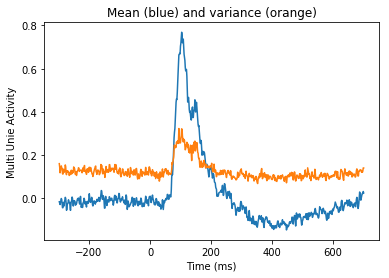

exec time : 1.81s


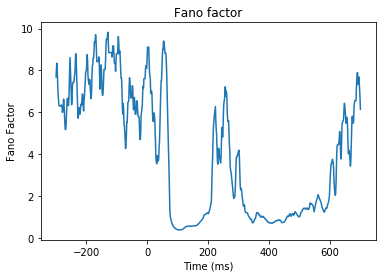

In [170]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for V1 (seen trials)

t = time.time()
data_type = "seen"
a = np.clip(s.get_data(data_type)[best_contrast],-10,2)

# Selecting the channel #4
channel_number = best_channel
d = a[:,channel_number,:]
stimulus_offset = 0
stimulus_end = 763


#Plotting a few individual trials
trials_plotted = 3
smooth = 1
for i in range(trials_plotted):
    title = 'Activity of ' + str(trials_plotted) + ' trials in the selected channel (smoothing window : ' + str(int(smooth*s.get_time_step())) +'ms)'
    s._core_figure_1(d[:,i][stimulus_offset:stimulus_end],title,smooth,False,(stimulus_offset,stimulus_end))    

plt.show()
smoothed_d = s.array_smoother(d,smooth,2)

#Plotting mean and std after the stimulus offset
s._core_figure_1(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end],'Activity averaged over all trials for the selected channel (smoothing window : ' + str(int(smooth*s.get_time_step())) +'ms)',1,False,(stimulus_offset,stimulus_end))
#plt.show()
title = 'Std and average activity over all trials for the selected channel (smoothing window : ' + str(int(smooth*s.get_time_step())) +'ms)'
title = 'Mean (blue) and variance (orange)'#' over trials for the best snr electrode and contrast'
s._core_figure_1(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end]),title,1,False,(stimulus_offset,stimulus_end))
plt.show()
title = 'Fanno factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s.get_time_step())) +'ms)'
ylabel = "Fano Factor"
title = 'Fano factor'

s._core_figure_1(np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10),title,10,False,(stimulus_offset,stimulus_end),ylabel)

print('exec time : ' + str(round(time.time()-t,2)) + 's')

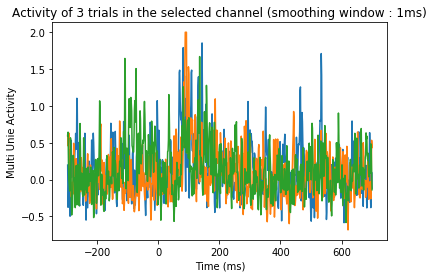

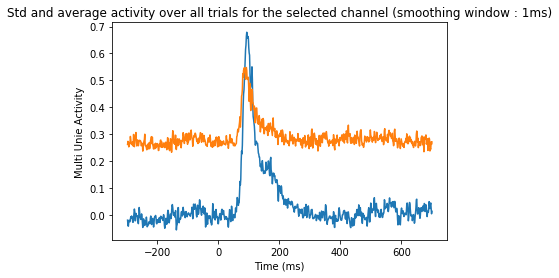

exec time : 0.97s


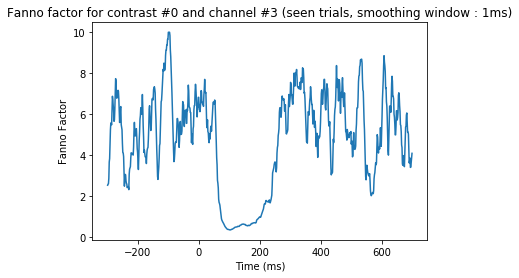

In [154]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for V4 (seen trials)

contrast = best_contrast2
t = time.time()
data_type = "seen"
a = np.clip(s2.get_data(data_type)[contrast],-10,2)

channel_number = best_channel2
d = a[:,channel_number,:]
stimulus_offset = 0
stimulus_end = 763


#Plotting a few individual trials
trials_plotted = 3
smooth = 1
for i in range(trials_plotted):
    title = 'Activity of ' + str(trials_plotted) + ' trials in the selected channel (smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)'
    s2._core_figure_1(d[:,i][stimulus_offset:stimulus_end],title,smooth,False,(stimulus_offset,stimulus_end))    

plt.show()
smoothed_d = s.array_smoother(d,smooth,2)

#Plotting mean and std after the stimulus offset
s2._core_figure_1(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end],'Activity averaged over all trials for the selected channel (smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)',1,False,(stimulus_offset,stimulus_end))
#plt.show()
s2._core_figure_1(np.std(smoothed_d,1)[stimulus_offset:stimulus_end],'Std and average activity over all trials for the selected channel (smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)',1,False,(stimulus_offset,stimulus_end))
plt.show()
title = 'Fanno factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s2.get_time_step())) +'ms)'
ylabel = "Fanno Factor"
s2._core_figure_1(np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10),title,10,False,(stimulus_offset,stimulus_end),ylabel)

print('exec time : ' + str(round(time.time()-t,2)) + 's')

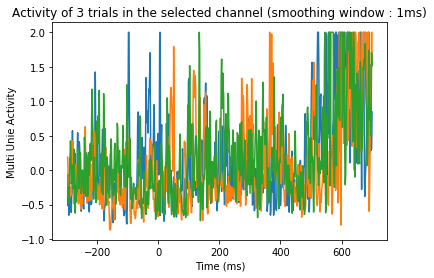

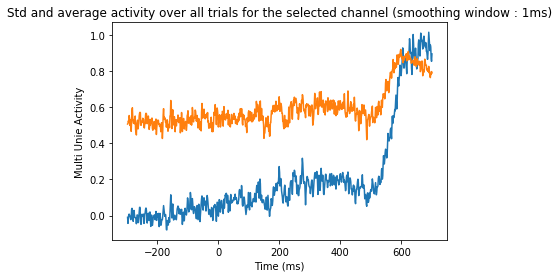

exec time : 0.92s


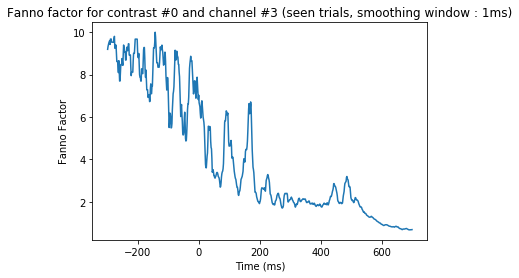

In [155]:
#################################################################################################
## Plotting Fanno Factor for best channel and best contrast for dlPFC (seen trials)

t = time.time()
data_type = "seen"
a = np.clip(s3.get_data(data_type)[best_contrast3],-10,2)

# Selecting the channel #4
channel_number = best_channel3
d = a[:,channel_number,:]
stimulus_offset = 0
stimulus_end = 763


#Plotting a few individual trials
trials_plotted = 3
smooth = 1
for i in range(trials_plotted):
    title = 'Activity of ' + str(trials_plotted) + ' trials in the selected channel (smoothing window : ' + str(int(smooth*s3.get_time_step())) +'ms)'
    s3._core_figure_1(d[:,i][stimulus_offset:stimulus_end],title,smooth,False,(stimulus_offset,stimulus_end))    

plt.show()
smoothed_d = s.array_smoother(d,smooth,2)

#Plotting mean and std after the stimulus offset
s3._core_figure_1(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end],'Activity averaged over all trials for the selected channel (smoothing window : ' + str(int(smooth*s3.get_time_step())) +'ms)',1,False,(stimulus_offset,stimulus_end))
#plt.show()
s3._core_figure_1(np.std(smoothed_d,1)[stimulus_offset:stimulus_end],'Std and average activity over all trials for the selected channel (smoothing window : ' + str(int(smooth*s3.get_time_step())) +'ms)',1,False,(stimulus_offset,stimulus_end))
plt.show()
title = 'Fanno factor for contrast #' + str(best_contrast) + ' and channel #' + str(best_channel) + ' (' + data_type + ' trials, smoothing window : ' + str(int(smooth*s3.get_time_step())) +'ms)'
ylabel = "Fanno Factor"
s3._core_figure_1(np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10),title,10,False,(stimulus_offset,stimulus_end),ylabel)

print('exec time : ' + str(round(time.time()-t,2)) + 's')

Trials for this contrast : 30


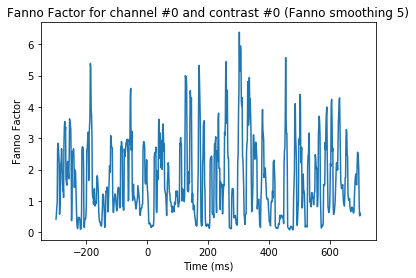

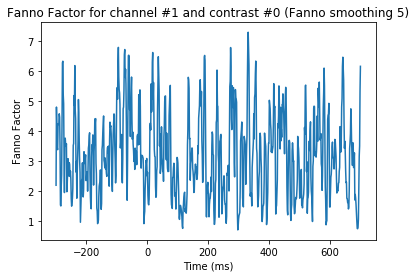

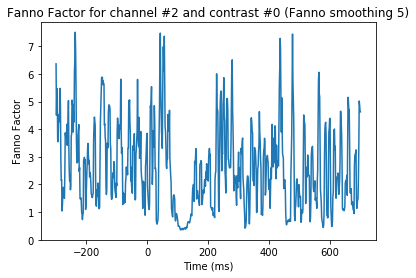

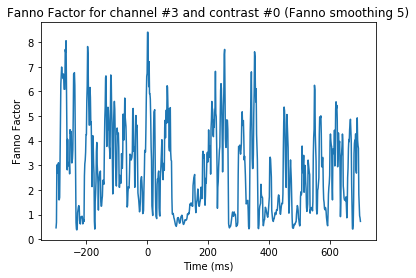

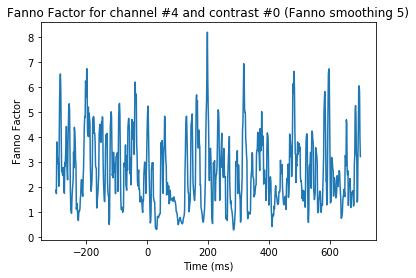

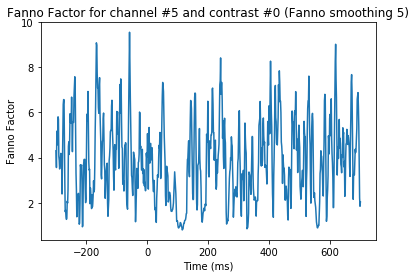

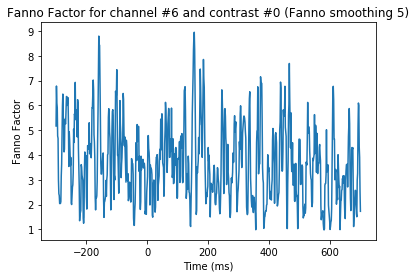

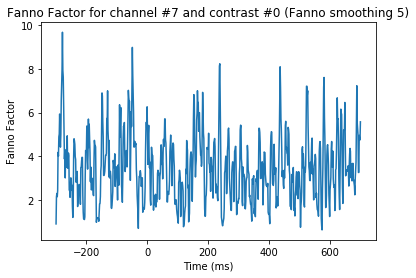

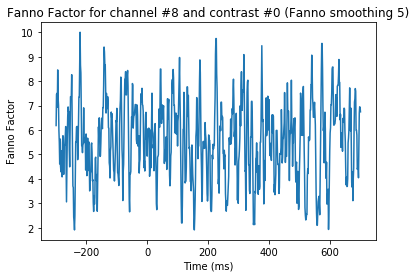

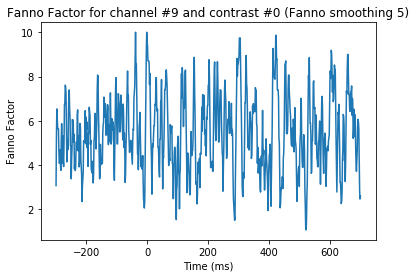

Trials for this contrast : 355


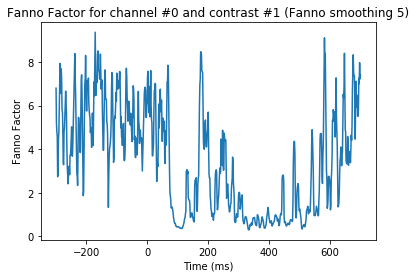

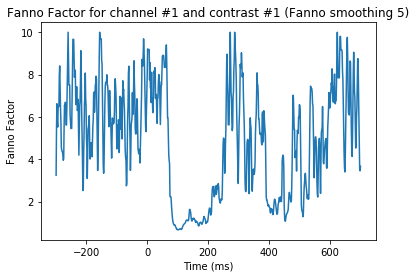

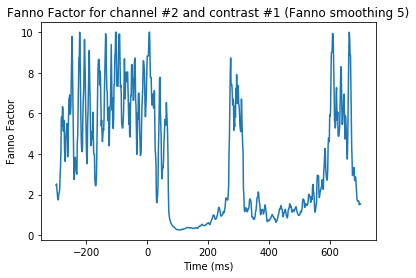

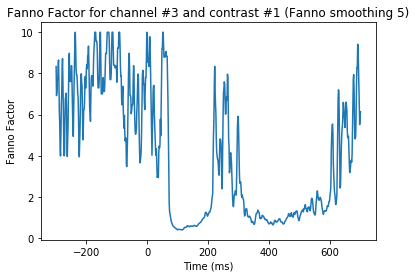

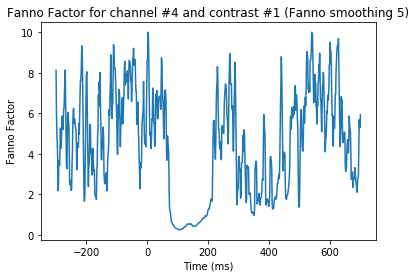

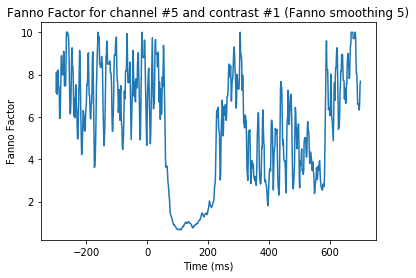

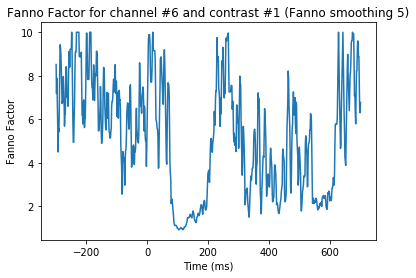

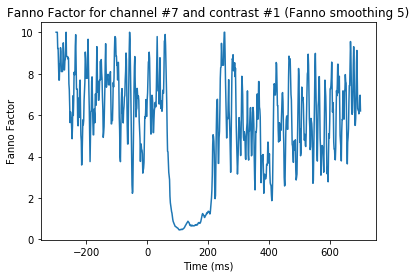

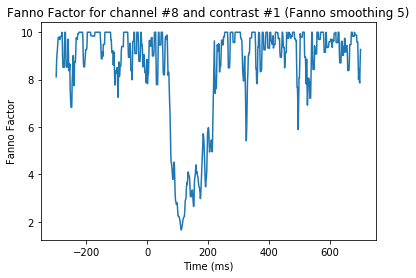

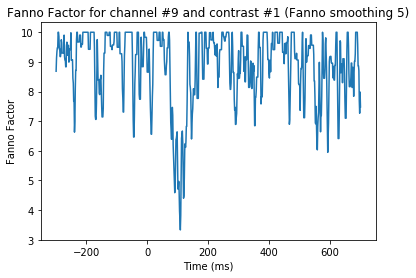

Trials for this contrast : 67


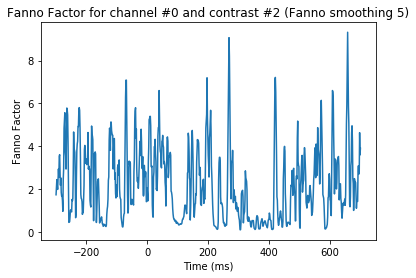

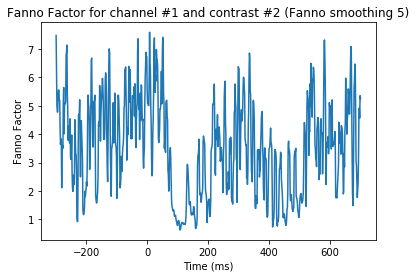

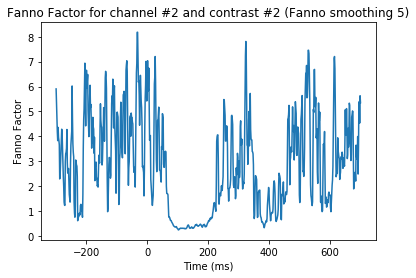

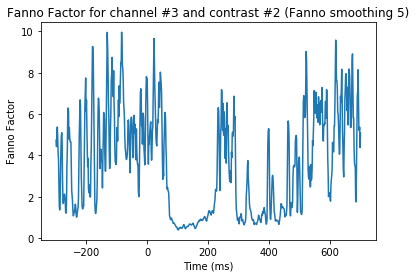

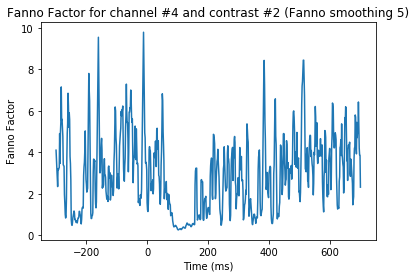

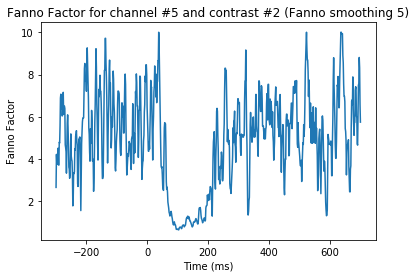

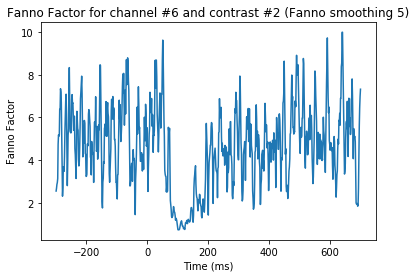

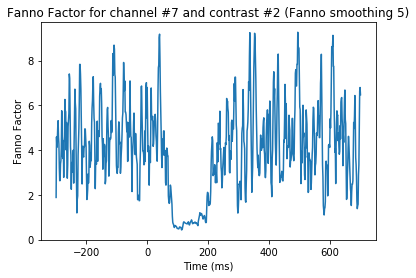

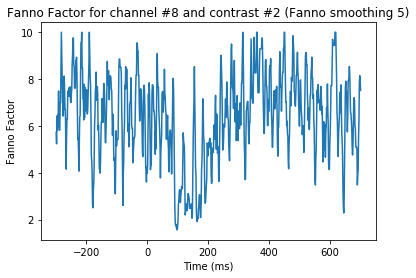

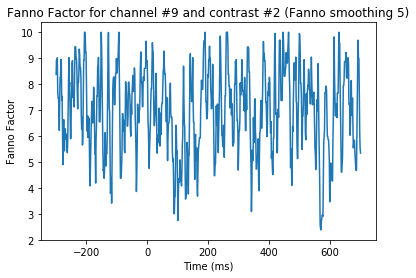

Trials for this contrast : 24


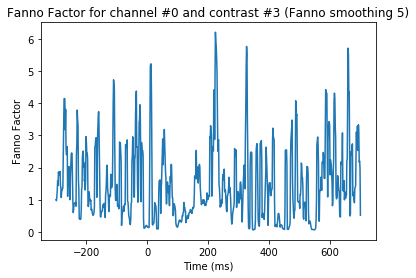

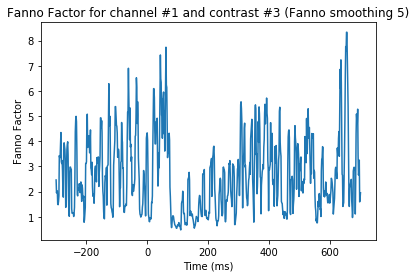

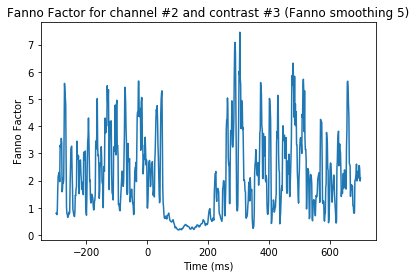

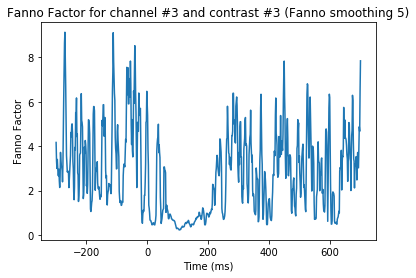

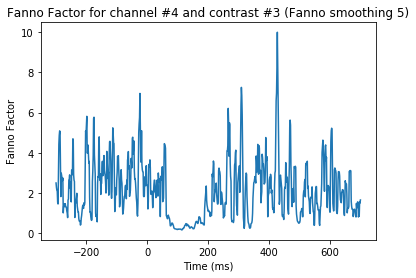

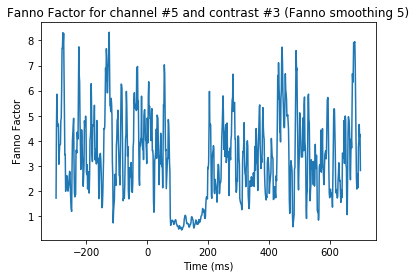

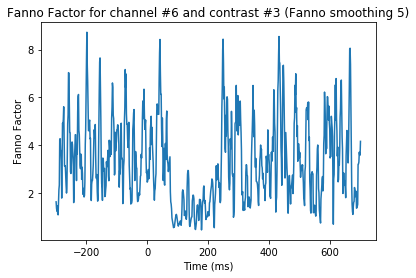

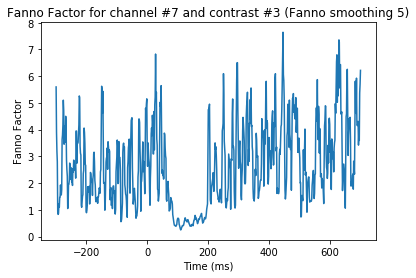

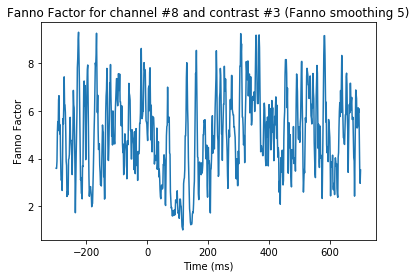

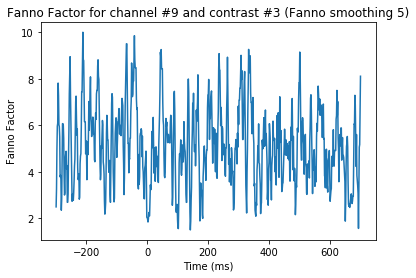

In [156]:
#################################################################################################
## Plotting all the fanno factors graph for all contrast, all channels


stimulus_offset = 0
stimulus_end = 763
s = Session(file_name,normalized=True)


for contrast in range(s.get_contrast_number()):
    a = s.get_data("seen")[contrast]
    print('Trials for this contrast : ' + str(len(a[0,0,:])))
    for channel_number in range(s.get_channel_number()):
        d = a[:,channel_number,:]


        #Plotting a few individual trials
        smooth = 1

        smoothed_d = s.array_smoother(d,smooth,2)
        fanno_smoothing = 5
        title = 'Fanno Factor for channel #' + str(channel_number) + ' and contrast #' + str(contrast) + ' (Fanno smoothing ' + str(fanno_smoothing) + ')'
        ylabel = "Fanno Factor"

        s._core_figure_1(np.clip(np.square(np.std(smoothed_d,1)[stimulus_offset:stimulus_end])/(np.abs(np.mean(smoothed_d,1)[stimulus_offset:stimulus_end])),0,10),title,fanno_smoothing,False,(stimulus_offset,stimulus_end),ylabel)
        plt.show()
